In [2]:
import seaborn as sns
import pandas as pd
import glob

In [3]:
df = pd.concat([pd.read_csv(path) for path in sorted(glob.glob('../results/layer_*_5000_examples.csv'))],
               keys=list(range(1,13)),
               names=['block'],
              ).droplevel(1).reset_index(0)

In [32]:
df

,block,word_type,pos,mean_similarity,identification_acc,support
0,1,content,ADJ,0.712893,1.000000,2577.0
1,1,content,ADV,0.732185,1.000000,2853.0
2,1,content,NOUN,0.719336,1.000000,7060.0
3,1,content,PROPN,0.689981,1.000000,1475.0
4,1,content,VERB,0.694456,1.000000,8620.0
...,...,...,...,...,...,...
235,12,other,NUM,0.182836,0.586466,266.0
236,12,other,PUNCT,0.128475,0.313541,11772.0
237,12,other,X,0.198136,0.500000,20.0
238,12,other,total,0.129790,0.319871,12058.0


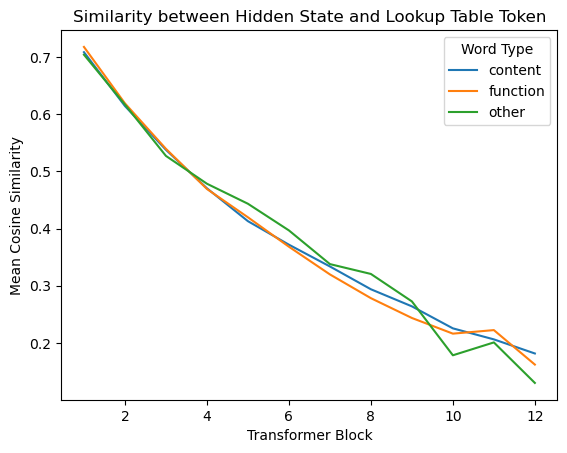

In [34]:
ax = sns.lineplot(data=df[(df.pos == 'total') & ~(df.word_type == 'total')], x='block', y='mean_similarity', hue='word_type')

ax.set_title('Similarity between Hidden State and Lookup Table Token')
ax.set_ylabel('Mean Cosine Similarity')
ax.set_xlabel('Transformer Block')
ax.legend(loc='upper right', title='Word Type')
figure = ax.get_figure()
figure.savefig('../figs/mean_similarity.png', dpi=300)

In [ ]:
# Y_SCALE = np.linspace(.15, .40, num=6)

# ax.set(ylim=(None, .35))
ax.set_yticks(np.linspace(.30, .40, num=3))
ax.set_xticks([2, 3, 4])
plt.tight_layout()
plt.show()   
